In [1]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size':16})

## **Investigating the globular cluster 47 Tuc with Gaia**

### **Introduction**
This work analyses the globular cluster 47 Tucanae by the means of a map of the cluster in equatorial coordinates, a colour magnitude diagram, which compares magnitude to colour index, and a Hertzsprung-Russel (HR) diagram, which compares the luminosity of stars to their effective temperature, here with a gradient for radius.

The data files are:
* _47tuc_positions.csv_:\
It contains basic information about the stars in the globular cluster:
  * ID (_source_id_): The identifier of each star. It is unique for each object.
  * Right Ascension (_ra_, in degrees): The equatorial coordinate (an astronomical coordinate system) along the celestial equator.
  * Declination (_dec_, in degrees): The equatorial coordinate perpendicular to the celestial equator.
  * Estimated distance (_r_est_, in parsecs): Estimated distance to the Earth.
* _47tuc_gaia_data.csv_:\
It contains details about the stars, plus the ID and equatorial coordinates as before:
  * Apparent G-band magnitude (_phot_g_mean_mag_, in mags): The apparent magnitude is the brightness of a star relative to its distance from Earth. The G magnitude is the specific apparent magnitude of the star seen through the broadest of the Gaia photometric bandpasses. Mags is a dimensionless unit.
  * (B - R) colour (_bp_rp_, in mags): A type of colour index (colour identifier).
  * Right ascension proper motion (_pmra_, mili arcseconds / year): The velocity at which the right ascension coordinate changes.
  * Declination proper motion (_pmdec_, mili arcseconds / year): The velocity at which the declination coordinate changes.

### **Data analysis**

<u>Data cleaning</u>

In [2]:
positions_df = pd.read_csv('./data/47tuc_positions.csv')
data_df = pd.read_csv('./data/47tuc_gaia_data.csv')

First, information about the dataframes is printed to understand them better:

In [3]:
print('Some information about the dataframes (column names, data types, number of rows):\n')
positions_df.info()
data_df.info()

Some information about the dataframes (column names, data types, number of rows):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7834 entries, 0 to 7833
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  7834 non-null   int64  
 1   ra         7834 non-null   float64
 2   dec        7834 non-null   float64
 3   r_est      7834 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 244.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7834 entries, 0 to 7833
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   source_id        7834 non-null   int64  
 1   ra               7834 non-null   float64
 2   dec              7834 non-null   float64
 3   phot_g_mean_mag  7834 non-null   float64
 4   bp_rp            7195 non-null   float64
 5   pmra             7834 non-null   float64
 6   pmdec            7834 non-null   float64

The dataframes are joined on the repeated columns in both dataframes, after confirming these columns contain the same values for each star. An outer merge is performed so that all stars/rows from both dataframes are kept.

In [4]:
gaia_df = pd.merge(left=positions_df, right=data_df, on=['source_id', 'ra', 'dec'], how='outer')
gaia_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7834 entries, 0 to 7833
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   source_id        7834 non-null   int64  
 1   ra               7834 non-null   float64
 2   dec              7834 non-null   float64
 3   r_est            7834 non-null   float64
 4   phot_g_mean_mag  7834 non-null   float64
 5   bp_rp            7195 non-null   float64
 6   pmra             7834 non-null   float64
 7   pmdec            7834 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 550.8 KB


The centre of the cluster is located at $RA = 6.022$ deg, $Dec = -72.081$ deg, where $RA$ is right ascension and $Dec$ is declination:

In [5]:
ra_mid = 6.022
dec_mid = -72.081

The stars are plotted so that it is easier to identify the cluster and estimate its radius:

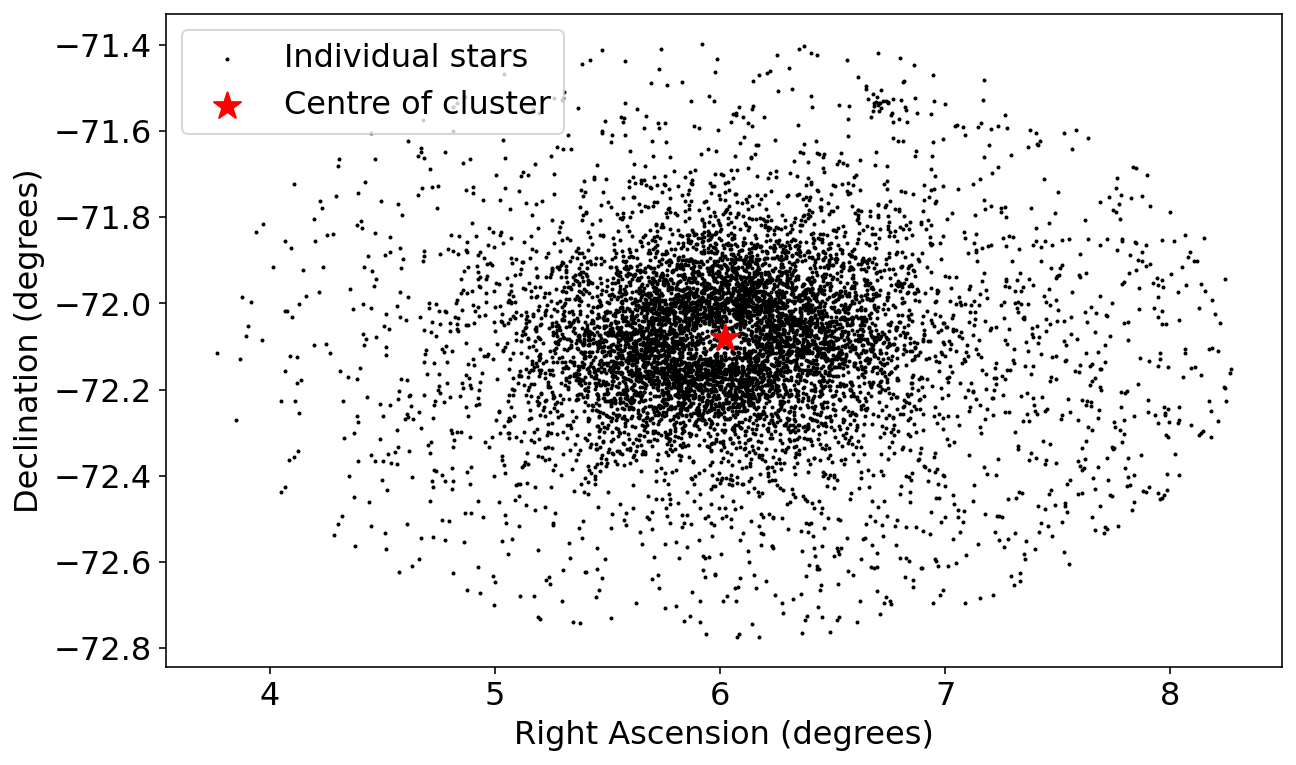

In [6]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)
ax.scatter(gaia_df.ra, gaia_df.dec, c='black', s=1, label='Individual stars')
ax.scatter(ra_mid, dec_mid, c='red', marker='*', s=200, label='Centre of cluster')
ax.set_xlabel('Right Ascension (degrees)')
ax.set_ylabel('Declination (degrees)')
ax.legend()
plt.show()

**Figure 1. Stars in the dataframe of _47 Tucanae_.** The globular cluster is clearly visible as the dense core.

Looking at the scale of the axis, it is clear that the cluster appears elliptical from the Earth, since the range of Right Ascension (_RA_) coordinates is wider than the one of Declination (_Dec_) coordinates. The approximate range of _RA_ coordinates of the cluster is $\pm 0.7$ degrees from the centre, and the one for _Dec_ coordinates, $\pm 0.3$ degrees. Since the ranges differ, here the cluster is approximated to an ellipse and only the stars that fall inside of the ranges for each coordinate (major and minor axis) are taken as part of the cluster.

The function _in\_cluster_ returns two values, taking as input the name of the dataframe, in case it is changed, and the ID of a star: the first is True if a star is in the cluster and False if it is not and the second one is the distance to the centre of the cluster, calculated with Pythagoras' theorem. This function is specific for the _47 Tuc_ cluster and can be used to get the returned information for any single star. The function takes the cluster as an elliptical group of stars:
\begin{align}
\text{distance} = \sqrt{(RA_{star}-RA_{centre})^2+(Dec_{star}-Dec_{centre})^2}.
\end{align}

_cluster\_df_ is a dataframe with the stars inside the cluster.

In [7]:
def in_cluster(df, id):
    ra = df.ra[df.source_id==id]
    dec = df.dec[df.source_id==id]
    distance = np.sqrt((ra-ra_mid)**2+(dec-dec_mid)**2)
    return (np.abs(ra-ra_mid) <= 0.7) & (np.abs(dec-dec_mid) <= 0.3), distance

cluster_df = gaia_df[in_cluster(gaia_df, gaia_df.source_id)[0]]

<u>Colour magnitude diagram</u>\
G apparent magnitude is plotted versus colour:

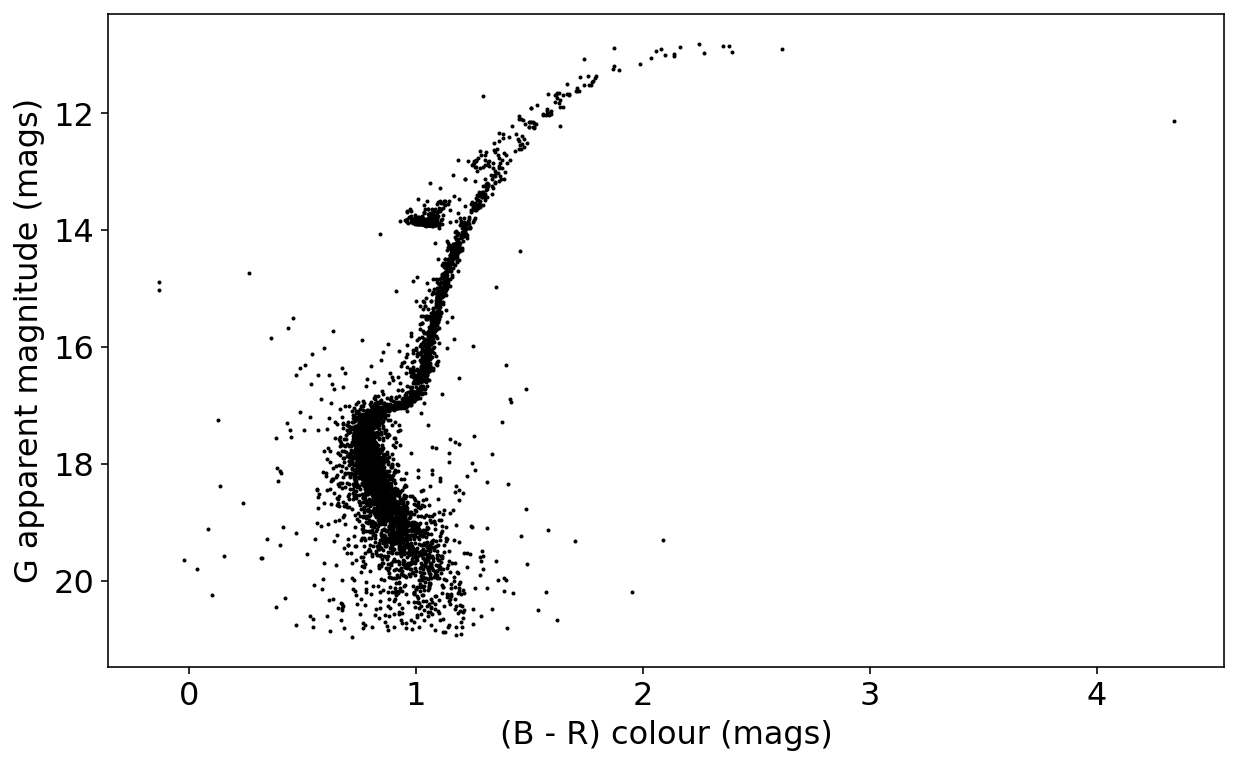

In [8]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(cluster_df.bp_rp, cluster_df.phot_g_mean_mag, c='black', s=1)
ax.invert_yaxis()
ax.set_xlabel('(B - R) colour (mags)')
ax.set_ylabel('G apparent magnitude (mags)')
plt.show()

**Figure 2. Colour magnitude diagram of the _47 Tucanae_ globular cluster with apparent magnitude.**

The apparent magnitude of a star is a measurement of relative brightness, assigning the brightness of the star Vega as seen from the Earth as the definition of zero magnitude. When the apparent magnitude is larger than 7 mags, the object is not visible to the human eye. As seen in the diagram of Fig. 2, _47 Tuc_ is not visible with naked eyes. The faintest ones, with G apparent magnitude larger than 17 mags, are in the main sequence. The ones in the branch to the right, which are brighter, are in a posterior stage. The cluster seems old, since a large part of the cluster is away from the main sequence.

The function _get\_G_ is used to get the absolute magnitude from the apparent magnitude, taking as input the distance from Earth of the star and the apparent magnitude:
\begin{align}
\text{G absolute magnitude} = g - 5log_{10}d+5,\tag{2}
\end{align}
where $g$ is the apparent magnitude and $d$ is the distance in parsecs.

The apply method of pandas is used because the applied function involves more than one column and it is not a completely simple/trivial function. Anyways, it is possible to apply the function directly to the columns too. The G absolute magnitudes are saved in the dataframes because later they are reused. Lambda functions are used wherever possible for conciseness.

After this, the G absolute magnitude is plotted against colour magnitude (the HR diagram) in Fig. 3.

C:\Users\amaia\AppData\Local\Temp\ipykernel_18188\3704392993.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['G'] = cluster_df.apply(lambda x: get_G(x.r_est, x.phot_g_mean_mag), axis=1)


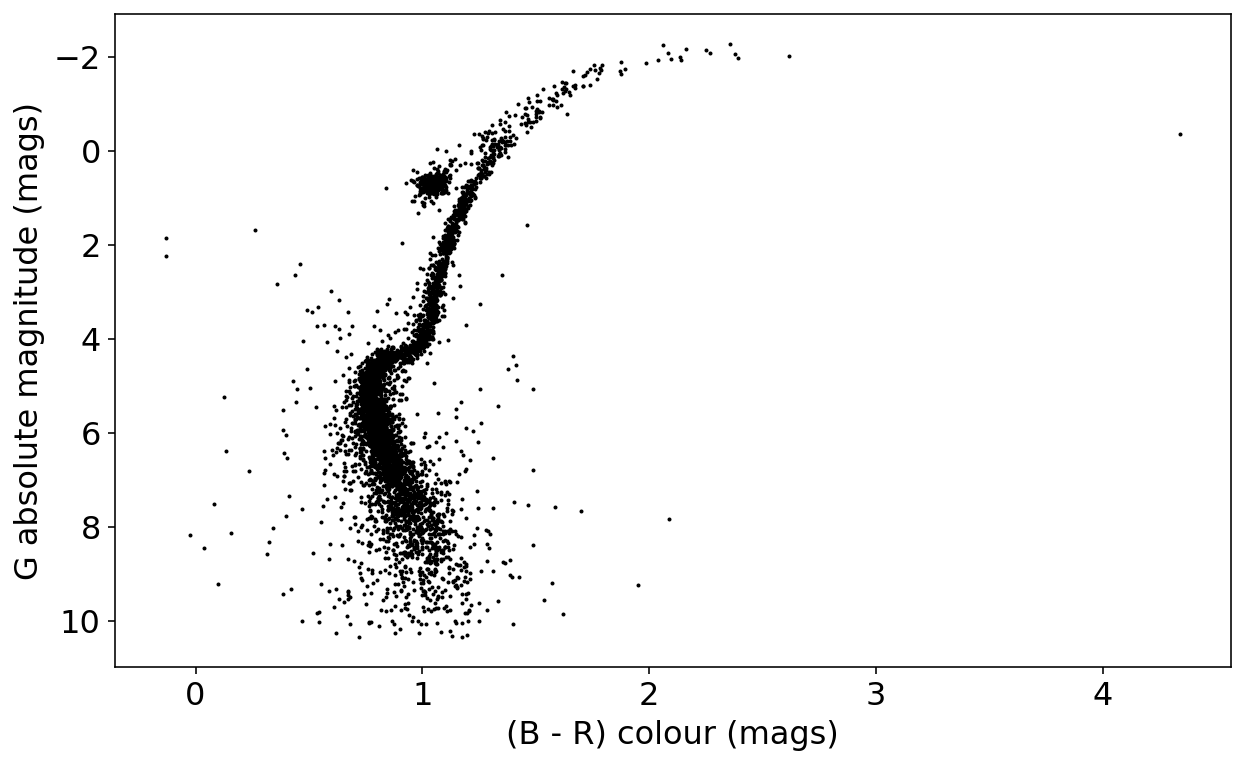

In [9]:
get_G = lambda d, g: g - 5*np.log10(d)+5

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
cluster_df['G'] = cluster_df.apply(lambda x: get_G(x.r_est, x.phot_g_mean_mag), axis=1)
ax.scatter(cluster_df.bp_rp, cluster_df.G, c='black', s=1)
ax.set_xlabel('(B - R) colour (mags)')
ax.set_ylabel('G absolute magnitude (mags)')
ax.invert_yaxis()
plt.show()

**Figure 3. Colour magnitude diagram of the _47 Tucanae_ globular cluster with absolute magnitude.**

An object's absolute magnitude is the apparent magnitude that the object would have if it were viewed from a distance of exactly 10 parsecs. All the stars in the cluster have positive apparent magnitudes, but some of them have negative absolute magnitudes as seen in Fig. 3. This result suggests that the cluster is further than 10 parsecs away from Earth without the need to check the data in the dataframe.

<u>Hertzsprung-Russel diagram</u>\
Next, luminosity against effective temperature are plotted. For that, other two functions are used. First, Eq. 3 for effective temperature:
\begin{align}
T_{eff} = 4600 \text{ K} \cdot \left(\frac{1}{0.92 \cdot (B-R)+1.7}+\frac{1}{0.92 \cdot (B-R)+0.62}\right).\tag{3}
\end{align}
The effective temperature, $T_{eff}$, of a body such as a star or planet is the temperature of a black body that would emit the same total amount of electromagnetic radiation. Then,

\begin{align}
L_s = \displaystyle 10^{\frac{M_{Sun}-M}{2.5}},\tag{4}
\end{align}
used to calculate the luminosity of a star in solar luminosities. Luminosity is the total amount of electromagnetic energy emitted per unit of time. $M_{Sun} = 4.81$ mags is the absolute magnitude of the Sun and M absolute magnitude.

C:\Users\amaia\AppData\Local\Temp\ipykernel_18188\2068459479.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['L_s'] = L_s(cluster_df.G)


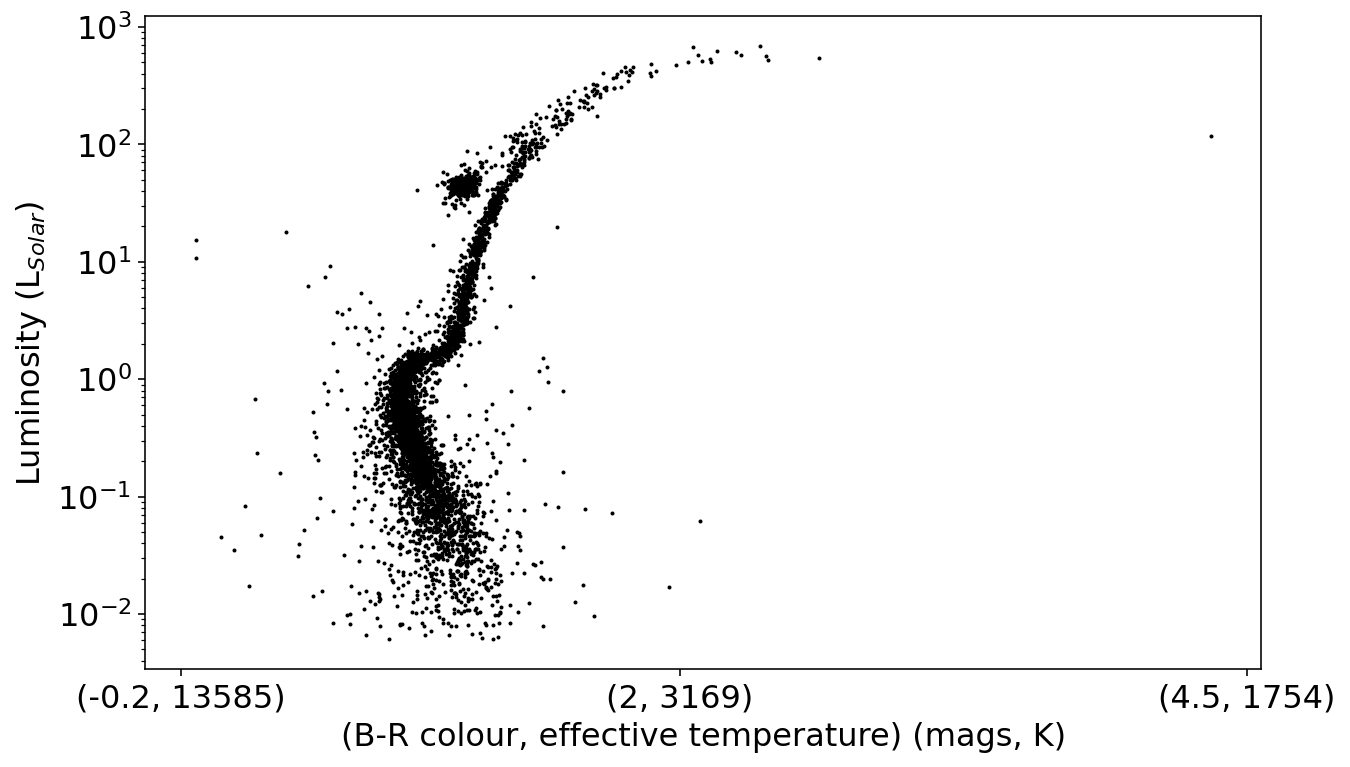

In [10]:
T_eff = lambda colour: 4600*(1/(0.92*colour+1.7)+1/(0.92*colour+0.62))

def L_s(M):
    M_s = 4.81
    return 10**((M_s-M)/2.5)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('(B-R colour, effective temperature) (mags, K)')
ax.set_ylabel('Luminosity (L$_{Solar}$)')
ax.set_yscale('log')
xticks = (-0.2, 2, 4.5)
ax.set_xticks(xticks)
ax.set_xticklabels((x, round(T_eff(x))) for x in xticks)

cluster_df['L_s'] = L_s(cluster_df.G)
sc = ax.scatter(cluster_df.bp_rp, cluster_df.L_s, s=1, marker='o', c='black')
plt.show()

**Figure 4. Hertzsprung-Russel diagram of the _47 Tucanae_ globular cluster.** The luminosity is in log $_{10}$ scale and the temperature is scaled by the B-R colour, to get the same horizontal spacing of stars from before.

Luminosity is in a way another type of brightness scale. In Fig. 4, it can be seen that the stars in the right branch have a larger luminosity than the Sun. The Sun is halfway its main sequence stage. Since the stars are more luminous just after leaving the main sequence, this confirms that the right branch is a posterior stage of the main sequence. Luminosity is shown not to be directly proportional to temperature, since there are stars which are more luminous than others at higher temperatures. This is because of the contribution of the radius to luminosity.

It is useful, then, to add a radius gradient to Fig. 4, with the help of Eq. 5:
\begin{align}
\frac{R}{R_{Solar}} = \left(\frac{T_{eff, Sun}}{T_{eff}}\right)^2 \cdot \sqrt{\frac{L}{L_{Solar}}},\tag{5}
\end{align}
where $T_{eff, Sun}=5756$ K is the effective temperature of the sun, $L$ the luminosity of the star, $L_{Solar}$ the defining luminosity for luminosity in solar units and $\frac{R}{R_{Solar}}$ is the radius of the star in solar units.

C:\Users\amaia\AppData\Local\Temp\ipykernel_18188\3599263189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['T_eff'] = T_eff(cluster_df.bp_rp)
C:\Users\amaia\AppData\Local\Temp\ipykernel_18188\3599263189.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['R_s'] = cluster_df.apply(lambda x: R_s(x.T_eff, x.L_s), axis=1)


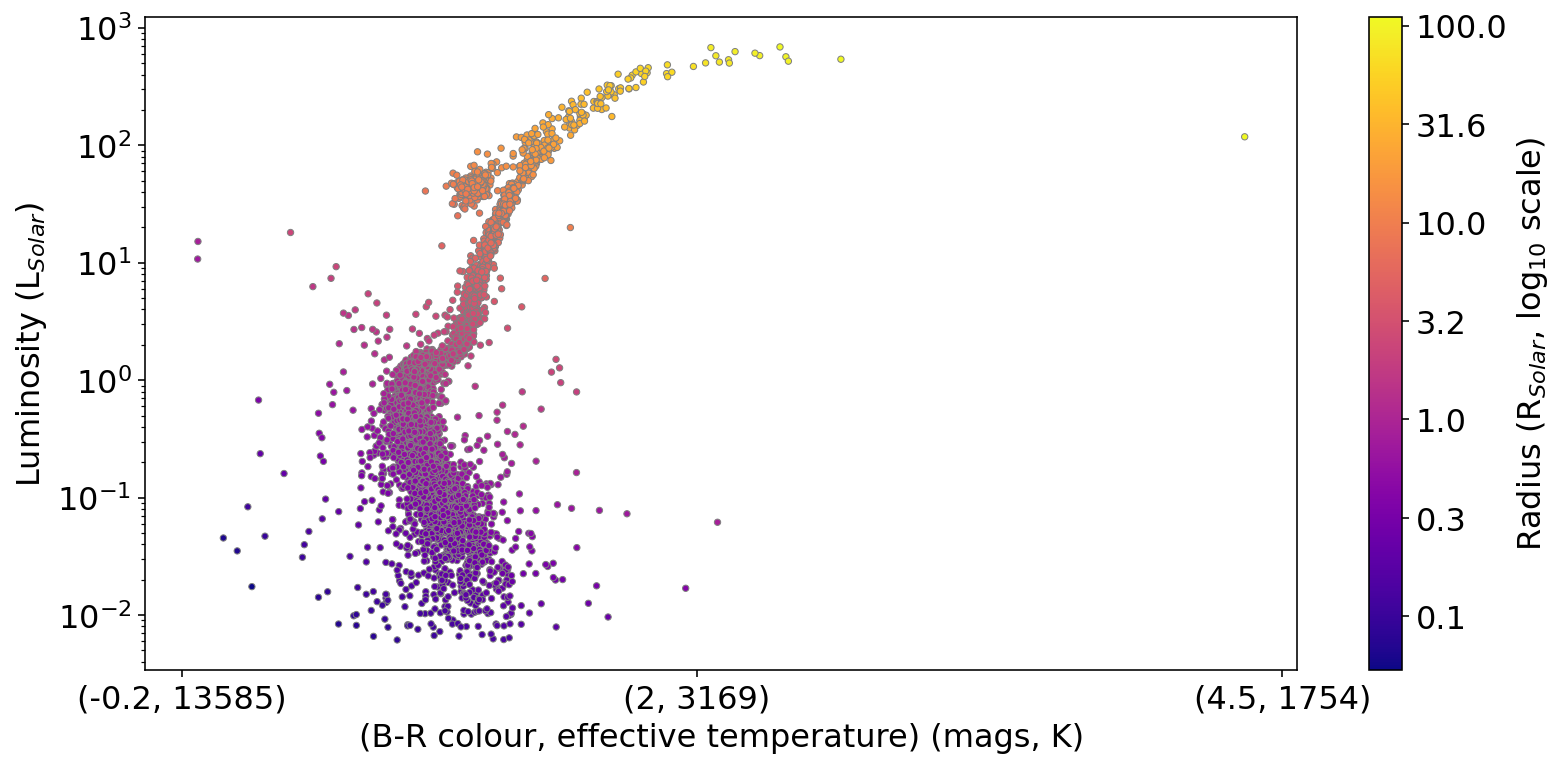

In [11]:
T_eff_s = 5756
R_s = lambda T, L_s: (T_eff_s/T)**2*np.sqrt(L_s)

cluster_df['T_eff'] = T_eff(cluster_df.bp_rp)
cluster_df['R_s'] = cluster_df.apply(lambda x: R_s(x.T_eff, x.L_s), axis=1)

fig = plt.figure(figsize=(12.9,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('(B-R colour, effective temperature) (mags, K)')
ax.set_ylabel('Luminosity (L$_{Solar}$)')
ax.set_yscale('log')
ax.set_xticks(xticks)
ax.set_xticklabels((x, round(T_eff(x))) for x in xticks)

cm = plt.cm.get_cmap('plasma')
sc = ax.scatter(cluster_df.bp_rp, cluster_df.L_s, c=np.log10(cluster_df.R_s), s=10, marker='o', cmap=cm, edgecolor='Grey', lw=0.5)
cbar = plt.colorbar(sc)
cbar.set_label('Radius (R$_{Solar}$, log$_{10}$ scale)')
cticks=np.linspace(-1, 2, 7)
cbar.set_ticks(cticks)
cbar.set_ticklabels(round(10**x, 1) for x in cticks)
plt.show()

**Figure 5. Hertzsprung-Russel diagram of the _47 Tucanae_ globular cluster with a radius gradient.**

It can be seen in Fig. 5 that most stars have similar radii, between 0.1 and 30 solar radii, and a few of them have as large a radius as 100 solar radius. Taking a logarithmic scale for the radius distributes this variance.

In the lower radius region, the radius does not vary much and the luminosity is more or less directly proportional to temperature. After this stage, the radius varies more and the temperature less. Here luminosity varies with the radius. Finally, in the yellow region, the one with highest radii, the luminosity is nearly constant, which is a result of temperature and radius compensating each other. The largest stars are also the most luminous, since the temperature change between stars is not large enough to compensate the change in radius.

In [12]:
print('About', round(len(cluster_df[cluster_df.L_s <= 1])/len(cluster_df),2)*100, '% of the stars have a luminosity equal or lower than the Sun.')
print('About', round(len(cluster_df[(cluster_df.T_eff >= 4000) & (cluster_df.T_eff <= 6000)])/len(cluster_df),2)*100, '% of the stars have an effective temperature between 4000 and 6000 K.')

About 65.0 % of the stars have a luminosity equal or lower than the Sun.
About 86.0 % of the stars have an effective temperature between 4000 and 6000 K.


Most of the stars seem to be in the main sequence, since they are less or equally luminous than the Sun. Also, most stars have temperatures of 4000-6000 K (red to white colours). The temperature of the Sun is in this range, with a surface colour of white. The ones at lowest temperatures are in a posterior stage of the main sequence and are red, as expected from what is known in astronomy.

### **Conclusions**
It is easier to draw conclusions from the data via diagrams like the ones used in this work (HR and colour magnitude) than from tables alone. That is one of the main reasons of their popularity. Regarding _47 Tucanae_, the cluster is approximately elliptical. The main sequence is visible as the diagonal line inclined to the left in the colour-magnitude and HR diagrams. Therefore, the cluster seems old, since many stars are in a posterior stage of the main sequence and the results show that the cluster is much more than 10 parsecs away from the Earth, already known from the dataframes. Still, most of the stars seem to be in the main sequence and have a temperature of about 4000-6000 K, which correspond to a colour of red to white. Regarding size, most stars have similar radii, but some outgrow the others significantly. Finally, depending on the stage of the star's cycle, the relative changes in radius and temperature vary, as discussed for Fig. 5 and the overall relative range for radius is larger than for temperature.